In [31]:
#probability density function

#standart imports
import numpy as np
import pandas as pd
from numpy.random import randn

#stats 
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
#puts a tick for every value 
dataset = randn(25)

(0.0, 1.0)

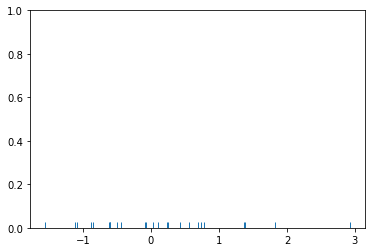

In [33]:
sns.rugplot(dataset)

#make them smaller 
plt.ylim(0,1)

<AxesSubplot:>

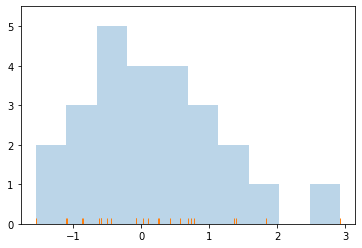

In [34]:
#plot histogram on top
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

#to plot two times put them in same container 

(0.0, 1.0)

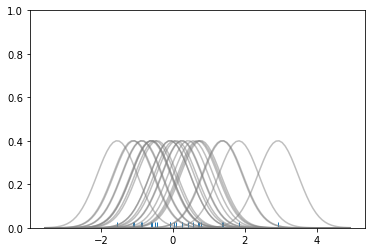

In [35]:
#gaussian shortcut
sns.rugplot(dataset)

#set x-min,max
x_min = dataset.min() - 2
x_max = dataset.max() + 2

#linspace is for linear equally spaced numbers
x_axis = np.linspace(x_min,x_max,100)

#bandwith estimation 
#std is standart deviation
bandwith = ( (4*dataset.std() **5) / (3*len(dataset))) ** 0.2

#create a list for the kernels
kernel_list = []

for data_point in dataset: 

    #create a kernel for each point and appened it ot the kernel_list
    kernel = stats.norm(data_point,bandwith).pdf(x_axis)
    kernel_list.append(kernel)

    #scale for plotting 
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4

    #plot
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis funcstions')

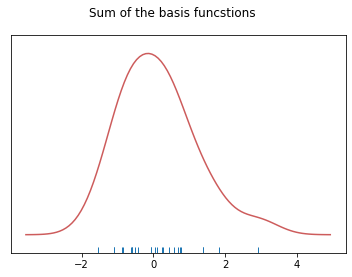

In [36]:
#get the sum of all

sum_of_kde = np.sum(kernel_list, axis=0)

#fig is figure
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([]) #removes ticks

plt.suptitle('Sum of the basis funcstions')

<AxesSubplot:ylabel='Density'>

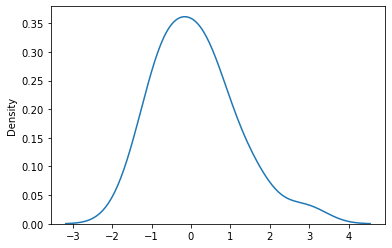

In [37]:
#you can make this in 1 step wtih seaborn

sns.kdeplot(dataset)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/tsvetomiradichevska/opt/anaco

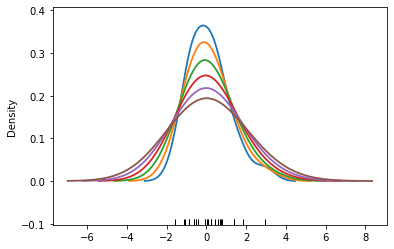

In [38]:
sns.rugplot(dataset, color = 'black')

#plot for varies bandiwth 

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8, label=bw)


/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alt

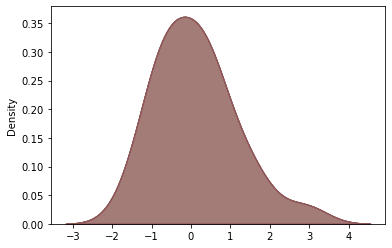

In [39]:
#kernel options
kernel_options = ['biw','cos','epa','gua','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern, label=kern, shade=True)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

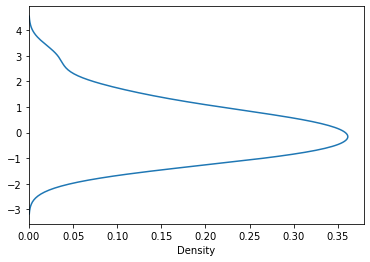

In [41]:
#plot on vertical
sns.kdeplot(dataset, vertical=True)

<AxesSubplot:ylabel='Density'>

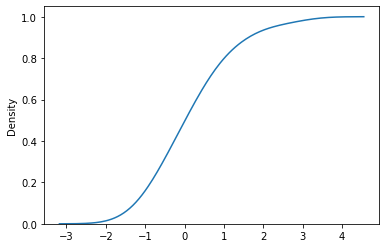

In [42]:
#cummulative function
sns.kdeplot(dataset,cumulative=True)

<AxesSubplot:>

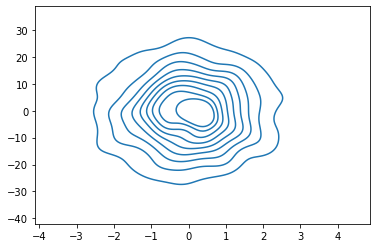

In [48]:
#multivariet density estimation
#make the mean of the center of the data
mean = [0,0]

#covarience
cov = [[1,0],[0,100]]

#create dataset
dataset2 = np.random.multivariate_normal(mean,cov,1000)

#dframe
dFrame = pd.DataFrame(dataset2,columns=['X','Y'])

#plotting
x = dFrame['X'].array

y = dFrame['Y'].array

sns.kdeplot(x=x,y=y)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

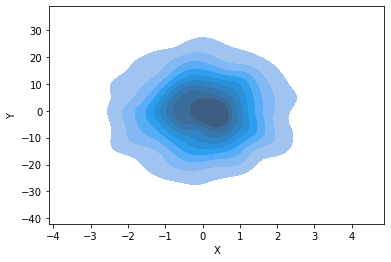

In [52]:
#pass two vectors separately
sns.kdeplot(dFrame.X,dFrame.Y, shade='True')

In [55]:
sns.kdeplot(dFrame,bw=1)

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: If using all scalar values, you must pass an index

In [57]:
# Or just use silverman again
sns.kdeplot(dFrame,bw='silverman')

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using silverman for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: If using all scalar values, you must pass an index

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


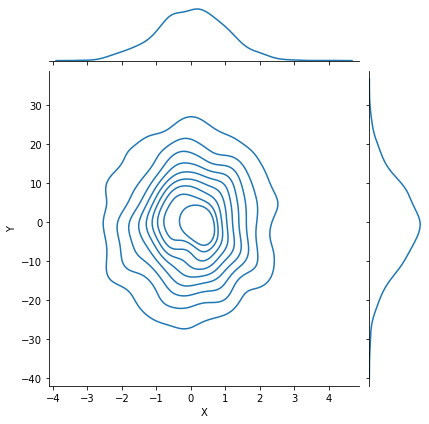

In [58]:
#joinplot
sns.jointplot('X','Y',dFrame, kind='kde')